In [1]:
!pip install rasterio
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 172.5 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 103.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 265.1 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 249.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 621.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 288.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 271.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 312.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 191.1 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To u

In [2]:

!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 179.2 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 218.9 kB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 294.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


raterio is used so we dont need to convert our files to GEOtiff. https://gis.stackexchange.com/questions/397638/opening-sentinel-2-data-with-python

In [3]:

import rasterio

from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


Image name is provided and opened

In [19]:
mac_path = "/Users/abdullah/Downloads/S2A_MSIL2A_20231015T055811_N0509_R091_T42RXU_20231015T091103.SAFE/GRANULE/L2A_T42RXU_A043417_20231015T055929/IMG_DATA/R60m/"

image_list=[
    "T42RXU_20231015T055811_B01_60m.jp2",
    "T42RXU_20231015T055811_B02_60m.jp2",
    "T42RXU_20231015T055811_B03_60m.jp2",
    "T42RXU_20231015T055811_B04_60m.jp2",
    "T42RXU_20231015T055811_B05_60m.jp2",
    "T42RXU_20231015T055811_B06_60m.jp2",
    "T42RXU_20231015T055811_B07_60m.jp2",
    "T42RXU_20231015T055811_B09_60m.jp2",
    "T42RXU_20231015T055811_B11_60m.jp2",
    "T42RXU_20231015T055811_B12_60m.jp2"
]


In [20]:
image_stack = []
for image_filename in image_list:
    image_to_open = mac_path + image_filename
    with rasterio.open(image_to_open) as src:
        img = src.read(1)  
        image_stack.append(img)

stacked_data = np.stack(image_stack, axis=2)

Visualize different bands

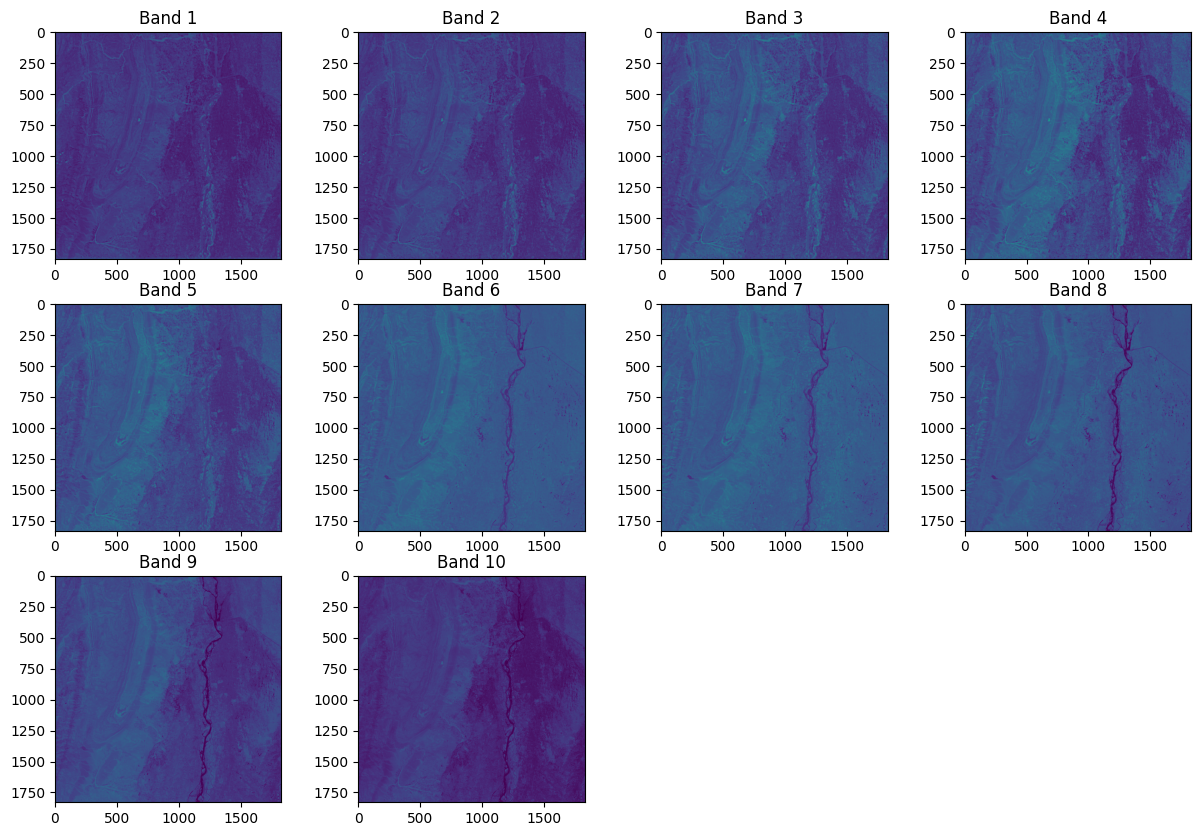

In [21]:
num_bands = stacked_data.shape[-1]
plt.figure(figsize=(15, 10))

for i in range(num_bands):
    plt.subplot(3, 4, i + 1)
    plt.imshow(stacked_data[:, :, i])
    plt.title(f'Band {i + 1}')
    plt.axis('on')  

plt.show()

1830
1830


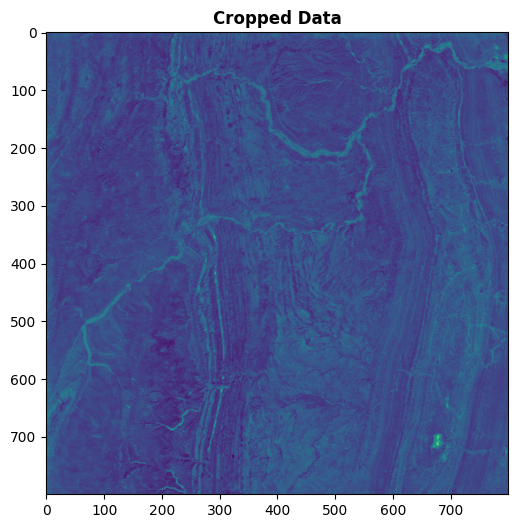

<Axes: title={'center': 'Cropped Data'}>

In [22]:
width, height = src.width, src.height
print(width)
print (height)

cropped_image = stacked_data[:800, :800, :]

plt.figure(figsize=(6, 6))
show(cropped_image[:, :, 0], title='Cropped Data')




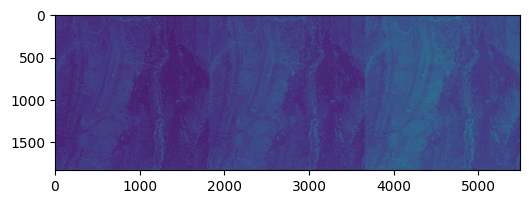

<Axes: >

In [23]:

concatenated_image = np.concatenate((stacked_data[:, :, 0], stacked_data[:, :, 1], stacked_data[:, :, 2]), axis=1)
plt.figure(figsize=(6, 6))
show(concatenated_image)

PCA APPLYING :

In [24]:
band_means = np.mean(stacked_data, axis=(0, 1))
band_medians = np.median(stacked_data, axis=(0, 1))
band_std_devs = np.std(stacked_data, axis=(0, 1))


In [25]:
flattened_data = stacked_data.reshape((-1, stacked_data.shape[-1]))


In [26]:
mean_values = np.mean(flattened_data, axis=0)

centered_data = flattened_data - mean_values

In [27]:
covariance_matrix = np.cov(centered_data, rowvar=False)


In [28]:

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


In [29]:

sorted_indices = np.argsort(eigenvalues)[::-1]#descending
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [30]:

k = 10
selected_eigenvectors = sorted_eigenvectors[:, :k]


(-0.5, 1829.5, 1829.5, -0.5)

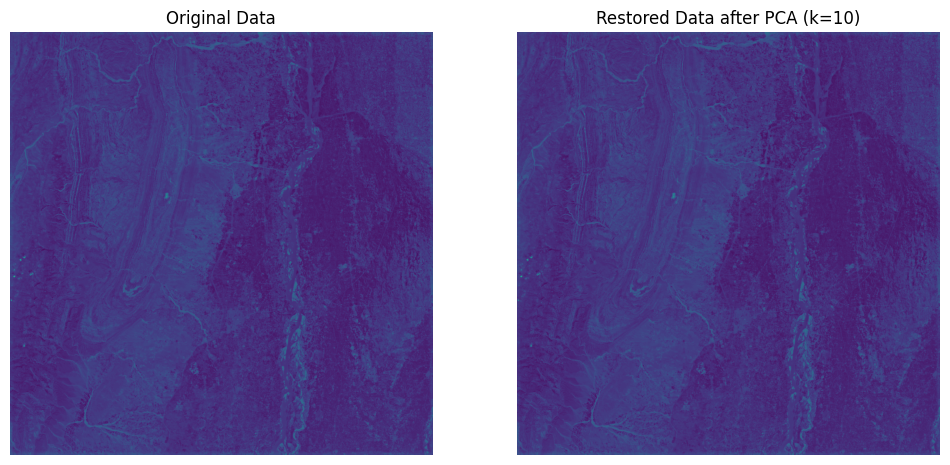

In [31]:

    reduced_data = np.dot(centered_data, selected_eigenvectors)

    restored_data = np.dot(reduced_data, selected_eigenvectors.T) + mean_values

    restored_data = restored_data.reshape(stacked_data.shape)
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.imshow(stacked_data[:, :, 0], aspect='equal')
    plt.title('Original Data')
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(restored_data[:, :, 0],  aspect='equal')
    plt.title(f'Restored Data after PCA (k={k})')
    plt.axis('off')

value of k is a good compromise between model complexity and accuracy.


Error Analysis 

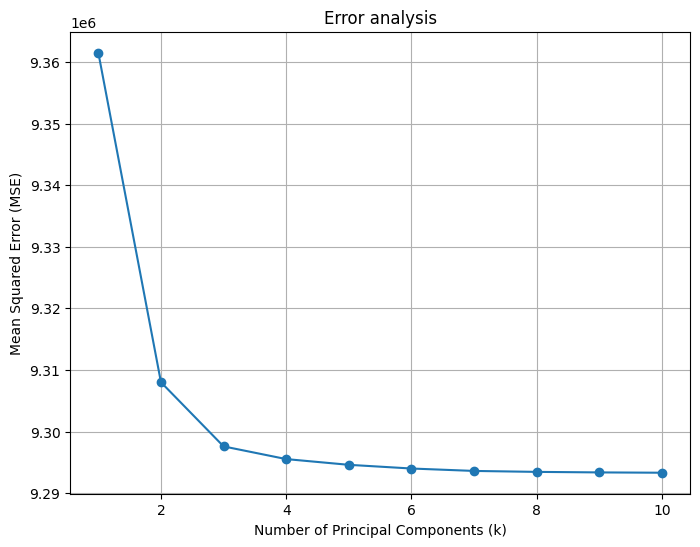

Optimal number of Principal Components (k): 10


In [32]:

def reconstruct_data(reduced_data, selected_eigenvectors):
    return np.dot(reduced_data, selected_eigenvectors.T)


max_k = min(stacked_data.shape[-1], 10)  
mse_values = []

for k in range(1, max_k + 1):

    selected_eigenvectors = sorted_eigenvectors[:, :k]


    reduced_data = np.dot(centered_data, selected_eigenvectors)

    reconstructed_data = reconstruct_data(reduced_data, selected_eigenvectors)

    try:
        
        mse = mean_squared_error(flattened_data, reconstructed_data)
        mse_values.append(mse)
    except ValueError as e:
        print(f"Error for k={k}: {e}")
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), mse_values, marker='o')
plt.title('Error analysis')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

optimal_k = np.argmin(mse_values) + 1
print(f"Optimal number of Principal Components (k): {optimal_k}")